In [90]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from euler_1d_weno import *
import numpy as np
from matplotlib import animation, rc
import os 

%matplotlib inline

#select problems(initial condition)
Initial_Condition = ['SOD', 'LAX', '123', 'Shockdensity', 'blastwave']
init = Initial_Condition[1]

#read result of WENO-JS, WENO-Z
data1 = pd.read_csv('./result_csv/result_WENO-JS_'+init+'.csv')
data1_arr = data1.values
data2 = pd.read_csv('./result_csv/result_WENO-Z_'+init+'.csv')
data2_arr = data2.values

#exact solution(WENO-Z with N=4000)
data3 = pd.read_csv('./result_csv/result_WENO-Z_'+init+'_exact.csv')
data3_arr = data3.values



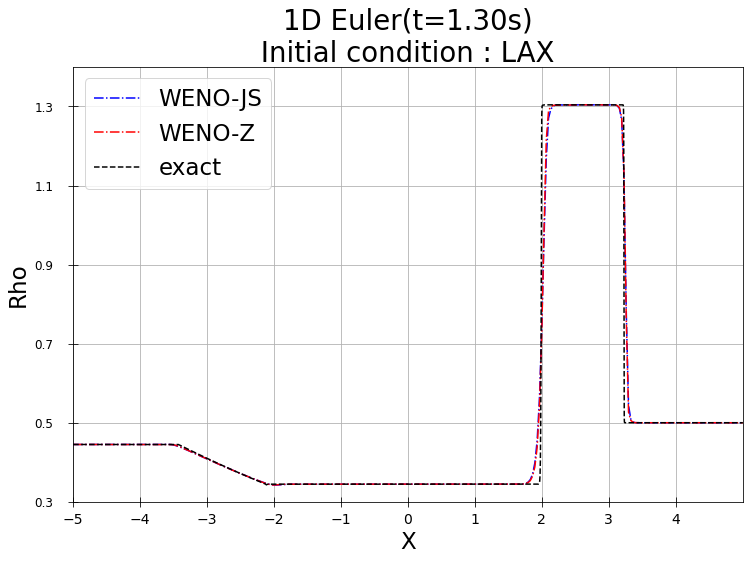

<Figure size 864x576 with 0 Axes>

In [91]:
# set figures, target time, grids for each initial value problem.
X_min, X_max = -5.0, 5.0
stepx=1
stepy=0.2
N=300
N2=4000
if init == "SOD":
    Y_min, Y_max = 0.0 , 1.2
    target_time = 2
elif init == "LAX" :
    Y_min, Y_max = 0.3 , 1.4
    target_time = 1.3
elif init == "123" :
    Y_min, Y_max = 0.0 , 1.2
    target_time = 1.0 
elif init == "Shockdensity" :
    Y_min, Y_max = 0.5 , 5.0
    target_time = 2.0  
    stepy=0.5
elif init == "blastwave" :
    N=400
    X_min, X_max = 0.0, 1.0
    Y_min, Y_max = 0.0 , 7.0
    target_time = 0.038    
    stepx=0.1
    stepy=0.5

#find target time in dataframe    
#in the paper; SOD:2s / Lax:1.3s / 123:1.0s / shock-density:2s / blastwaves:0.038s

graph_time = 0
graph_time_exact = 0
time=0
time_exact=0
while True :
    if time < target_time : 
        time = data2_arr[graph_time,1]
        graph_time +=1
    else : 
        break
        
while True :
    if time_exact < target_time : 
        time_exact = data3_arr[graph_time_exact,1]
        graph_time_exact +=1
    else : 
        break        
        
#initialize figure axis.
#desired grids of results are differ from exact solution (solution: N=300, exact solution : N=4000)

X = np.zeros(N)
X[3:-3] = np.linspace(X_min,X_max,N-6)
X2 = np.zeros(N2)
X2[3:-3] = np.linspace(X_min,X_max,N2-6)

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams.update({'font.size': 23})

# title of plot
if init == 'blastwave':
    plt.title('1D Euler(t=%2.3fs)\n Initial condition : %s '  % (time,init))
else:
    plt.title('1D Euler(t=%2.2fs)\n Initial condition : %s '  % (time,init))

# plotting result graph
plt.xlabel('X')  
plt.ylabel('Rho') 
plt.xlim(X_min,X_max)
plt.ylim(Y_min,Y_max)
plt.xticks(np.arange(X_min, X_max,step=stepx))
plt.yticks(np.arange(Y_min,Y_max,step=stepy))
plt.tick_params(axis='x', direction='inout', length=10, pad=6, labelsize=14)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12,)
plt.plot(X[3:-3], data1_arr[graph_time,2:],'-.b',label='WENO-JS')
plt.plot(X[3:-3], data2_arr[graph_time,2:],'-.r',label='WENO-Z')
plt.plot(X2[3:-3], data3_arr[graph_time_exact,2:],'--k',label='exact')
plt.grid(True)
plt.legend()
fig1=plt.gcf()
plt.show()
plt.draw()
if not os.path.exists('result_graph'):
    os.makedirs('result_graph')   
fig1.savefig('result_graph/'+'result_fig_'+init+'.png',dpi=100)



